In [144]:
# import matplotlib
#!/usr/bin/env python
# coding: utf-8
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import dataFunc
import pandas as pd
import ast
import os
from sklearn import preprocessing
from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import euclidean
import time
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from kneed import KneeLocator
import random

In [182]:
#read files and process
############################################################
#read data files from folder to dictionary of data frames

path = '../driving data/colt-all-atributes/4drivers/'
names = ['.csv']

dfAll = []
files = []
counter = 0
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            if '~' in file:
                continue
            df_temp = ''
            counter += 1
            name = file.split('-')[0]
            filepath = r + file
            df_temp = pd.read_csv(filepath, delimiter = ',', na_values='-')
            df_temp['driver'] = str(name)
#             print(name + ' ' + str(df_temp.shape) + ' ' + file)
#             print(filepath)
            print(df_temp.shape)
            dfAll.append(df_temp.reset_index(drop=True))

(863, 164)
(590, 164)


In [183]:
############################################################
#read columne list to select from file
col_list = list()
fileName = '/Users/dmitrrijs/Documents/LU/magistra_darbs/python-files/col_list-IG.txt'
with open(fileName) as f:
    for line in f:
        print(line.strip('\n'))
        col_list.append(line.strip('\n'))

Throttle_Position(Manifold)(prc)
Engine_Load(prc)
O2_Volts_Bank_1_sensor_2(V)
Turbo_Boost_&_Vacuum_Gauge(bar)
driver


In [184]:
############################################################
#clean from rows with column names
for i in range(len(dfAll)):
    dfAll[i] = dfAll[i][dfAll[i].iloc[:,0] != dfAll[i].columns[0]]

# removo non acii from column names
for i in range(len(dfAll)):
    dataFunc.remove_non_ascii_column(dfAll[i])

#select only columns from the list
for i in range(len(dfAll)):
    dfAll[i] = dfAll[i][(col_list)]

# replace infinity with 0
for i in range(len(dfAll)):
    dfAll[i] = dfAll[i].replace('∞',0).round(3)

#values to numeric except 'driver'
for i in range(len(dfAll)):
    dataFunc.convert_numeric(dfAll[i],)

#visualise_treshold
# dataFunc.visualise_treshold(dfAll)

#fill NaN values with 0
for i in range(len(dfAll)):
    dfAll[i] = dfAll[i].fillna(0)


In [169]:
#give concat data frame to function
def create_classes(df):
    cls_actual = []
    df = df.reset_index(drop=True)
    for i in range(len(df.index)):
        cls_actual.append(df['driver'][i])

    cls_names = set(cls_actual)
    cls_names = list(cls_names)

    map_name = {}
    class_count = 0
    for name in cls_names:
        print(name + ' = ' + str(class_count))
        map_name[name] = class_count
        class_count += 1

    for i in range(len(cls_actual)):
        cls_actual[i] = map_name[cls_actual[i]]

#     print(cls_actual)
    return cls_actual

In [185]:
#concat files after cleaning and making class vector
df_concat_with_driver = pd.concat(dfAll)
df_concat_with_driver.shape
#DROP driver column
df_concat = df_concat_with_driver.drop(columns=['driver'])
df_concat_with_driver = df_concat_with_driver.reset_index(drop=True)
# df_concat = df_concat.drop(columns=['Trip_Time(Since_journey_start)(s)']).reset_index(drop=True)

In [186]:
#normalize with MinMaxScaler
col_list_1 = col_list
col_list_1.remove('driver')
mms = preprocessing.MinMaxScaler()
mms.fit(df_concat)
data_transformed = mms.transform(df_concat)
# df_transformed = pd.DataFrame(data_transformed,columns = col_list_1)
# df_transformed['driver'] = df_concat_with_driver['driver']

In [187]:
def clusterDIS(DIS, numberOfClusters):

    sumDIS = float('inf')
    
    #make coupe of iterations to find best kmeans prediction
    for s in range(10):
        kmeans = KMeans(n_clusters=numberOfClusters).fit(DIS)
        SUMD = kmeans.inertia_
#         print('sumdis' + str(SUMD))
        if SUMD < sumDIS :
            sumDIS = SUMD
            cls = kmeans.labels_
          
    return cls,sumDIS

1
2
3
4
5


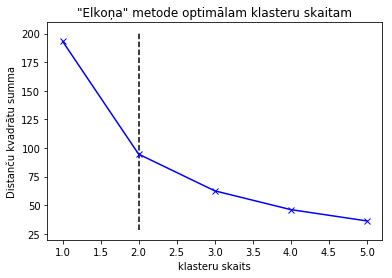

dima = 0
Aprēķinātais klasteru skaits : 2
ARI : 0.0


In [188]:
#make coupel of iterations to find best kmeans prediction
# coding: utf-8

Kmin = 1
Kmax = int(len(dfAll) / 2) + 2
# Kmax = 6


CLS = []
SUMDIS = []
K = []

for k in range(Kmin, Kmax):
    print(k)
    cls,sumDIS = clusterDIS(data_transformed, k)
    K.append(k)
    CLS.append(cls)
    SUMDIS.append(sumDIS)
    

#####################################################
# . PLOT AND FIND CLUSTERS


plt.plot(K, SUMDIS, 'bx-')
plt.xlabel('klasteru skaits')
plt.ylabel(u'Distanču kvadrātu summa')
plt.title(u'"Elkoņa" metode optimālam klasteru skaitam')
plt.vlines(clusters, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

kn = KneeLocator(K, SUMDIS, curve='convex', direction='decreasing')
clusters = kn.knee
# print('Clusters all : ' + str(clusters))
# print('Labesl all : ' + str(CLS[K.index(clusters)]))


#####################################################
# . ARI RESULTS

cls_true = create_classes(df_concat_with_driver)
cls_all = CLS[K.index(clusters)]
# print('Actual  : ' +'[' + str(' '.join(map(str, cls_true))) + ']')
# print('cls_all : ' + str(cls_all))
print('Aprēķinātais klasteru skaits : ' + str(clusters))

Rscore_all = round(adjusted_rand_score(cls_all, cls_true),5)
print('ARI : ' + str(Rscore_all))